In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# Importing Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
df = pd.read_csv('/content/drive/MyDrive/DS Data Sets/Clustering/EastWestAirlines.csv')


In [15]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [17]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [21]:
df2=df.drop(['ID#'],axis=1)
df2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [23]:
# Normalize heterogeneous numerical data
def norm_func(i):
  x = (i-i.min()/i.max()-i.min())
  return (x)

In [25]:
# Normalized Data Frame
df2_norm = norm_func(df2)
df2_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143.0,0.0,-0.2,-0.333333,-0.2,174.0,1.0,0.0,0.0,6997.999759,0.0
1,19244.0,0.0,-0.2,-0.333333,-0.2,215.0,2.0,0.0,0.0,6965.999759,0.0
2,41354.0,0.0,-0.2,-0.333333,-0.2,4123.0,4.0,0.0,0.0,7031.999759,0.0
3,14776.0,0.0,-0.2,-0.333333,-0.2,500.0,1.0,0.0,0.0,6949.999759,0.0
4,97752.0,0.0,2.8,-0.333333,-0.2,43300.0,26.0,2077.0,4.0,6932.999759,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476.0,0.0,-0.2,-0.333333,-0.2,8525.0,4.0,200.0,1.0,1400.999759,1.0
3995,64385.0,0.0,-0.2,-0.333333,-0.2,981.0,5.0,0.0,0.0,1392.999759,1.0
3996,73597.0,0.0,1.8,-0.333333,-0.2,25447.0,8.0,0.0,0.0,1399.999759,1.0
3997,54899.0,0.0,-0.2,-0.333333,-0.2,500.0,1.0,500.0,1.0,1398.999759,0.0


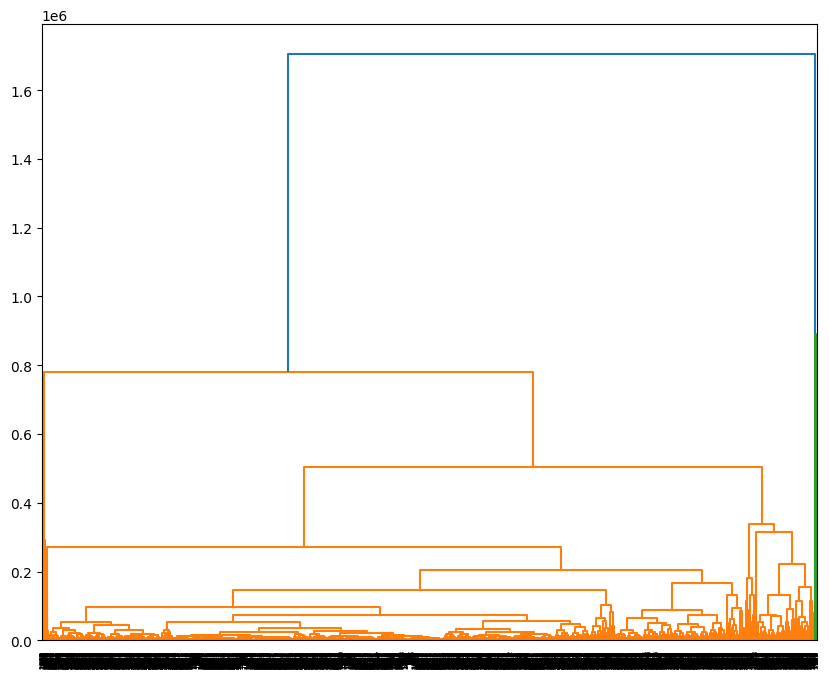

In [26]:
# Create Dendrograms
plt.figure(figsize=(10,8))
dendrograms=sch.dendrogram(sch.linkage(df2_norm,'complete'))

In [28]:
# Create Clusters
hclusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [30]:
y=pd.DataFrame(hclusters.fit_predict(df2_norm),columns=['clustersid'])
y['clustersid'].value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


2    2185
4    1030
1     624
3     134
0      26
Name: clustersid, dtype: int64

In [32]:
# Adding Clusters to dataset
df2['clustersid']=hclusters.labels_
df2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,4
3996,73597,0,3,1,1,25447,8,0,0,1402,1,4
3997,54899,0,1,1,1,500,1,500,1,1401,0,4


In [35]:
df2.groupby('clustersid').agg(['mean']).reset_index()

,clustersid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,841016.769231,512.692308,3.346154,1.000000,1.115385,52888.269231,22.346154,1797.807692,6.653846,6447.269231,0.846154
1,1,158510.772436,276.342949,3.035256,1.008013,1.060897,35739.006410,17.153846,851.137821,2.493590,4945.536859,0.483974
2,2,22129.604577,95.710755,1.469565,1.018307,1.000000,7136.640732,8.241190,225.946453,0.712128,3656.610984,0.298398
3,3,355242.694030,424.671642,3.059701,1.022388,1.000000,46811.955224,19.574627,1582.291045,4.835821,5654.537313,0.701493
4,4,75338.683495,120.885437,2.557282,1.009709,1.007767,22349.167961,14.059223,539.990291,1.514563,4338.904854,0.399029


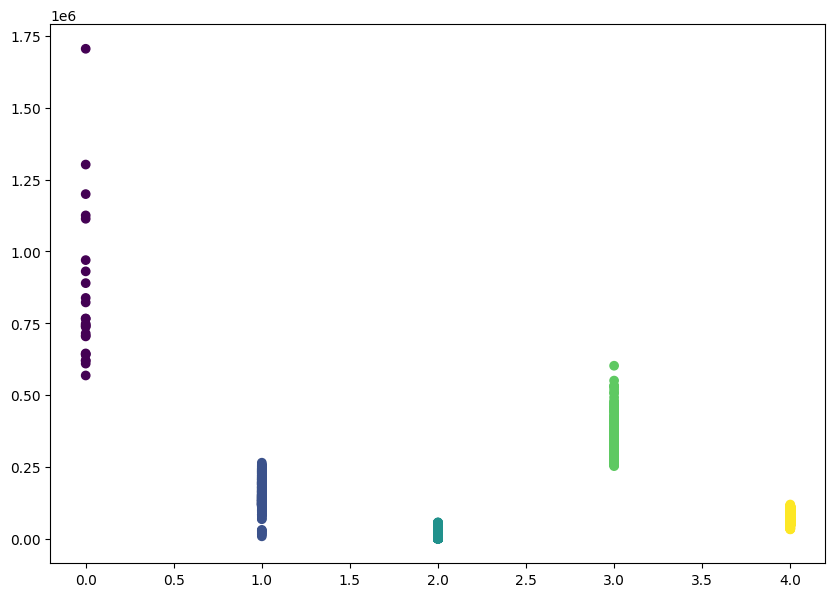

In [36]:
# Plot Clusters
plt.figure(figsize=(10,7))
plt.scatter(df2['clustersid'],df2['Balance'],c=hclusters.labels_)